In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
import folium
import folium.plugins
from os import path
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

In [3]:
chart_studio.tools.set_credentials_file(username='bjosie',api_key='xp4FpbhzLtw7JlE45A5M')

<h1>Quick overview of instagram engagement for @loveandtheft </h1>

<h4>Analyst: Ben Josie</h4>
<h5>bjosie01@gmail.com</h5>

<h2><strong>1. Followers vs. Engagement</strong></h2>

<h4>Overview</h4>

<p>Instagram integrates a <a href="https://sproutsocial.com/insights/instagram-algorithm/" target="blank">constantly  changing algorithm</a> for posts in their feed and as of today, <i>user engagement</i> is one of the most important metrics to watch.<p>
<p>
    A high follower count is great, but it's far more important to make sure that people who see your posts are taking the time to like, comment, share or visit your page. If you have a high level engagement on a post, that post will be pushed to the top of your followers' feeds. The higher level of engagement on a post, the more people are going to see it, and eventually it could end up on instagram's explore page, for users who are not already followers.
</p>

<h4>Methodology</h4>

<p>I looked at every post from this profile in the last year (March 2020-March 2021). Every single account that liked or commented was saved and added to a spreadsheet, where we can even see the number of times they engaged in a given month! This is how I determined the set of "Engaged Users"</p>

<h3>Top Metrics At a Glance</h3>

<h4>Post Engagement for March 2020-March 2021</h4>
<h6>(data can be found in at_a_glance.csv)<h6>

In [4]:
aag = pd.read_csv('at_a_glance.csv')
aag

,Period,Posts,Likes,Comments,Likes per Post,Comments per Post,Engaged Users
0,April 2020,2,1810,36,905.000000,18.000000,1539
1,August 2020,2,2390,94,1195.000000,47.000000,1470
2,December 2020,1,261,5,261.000000,5.000000,259
3,February 2021,2,1427,34,713.500000,17.000000,1158
4,January 2021,2,1841,66,920.500000,33.000000,1271
5,July 2020,1,2114,27,2114.000000,27.000000,1006
6,June 2020,1,584,17,584.000000,17.000000,579
7,March 2020,6,2913,59,485.500000,9.833333,1730
8,March 2021,1,667,20,667.000000,20.000000,671
9,May 2020,2,1325,27,662.500000,13.500000,1132


<p>Total Posts: <strong>28</strong></p>
<p>Total Likes: <strong>19,965</strong></p>
<p>Total Comments: <strong>491</strong></p>
<p>Likes Per Post: <strong>713</strong></p>
<p>Comments Per Post: <strong>17.5</strong></p>
<p style="color:crimson;">Engaged Users: <strong>6439</strong></p>

<h4><strong>Insights</strong></h4>
<ul>
    <li>The posts that tend to perform best are those with edited images of one or both bandmates. 
        <ul>
            <li>Love and Theft's audience loves seeing what they're up to.</li>
            <li>My instinct is that editing/adding a filter adds to the "mystique" factor of the group.</li>
        </ul>
    <li>July 2020 stands out as the leader of likes on a single post--by a longshot--for a post commemorating the life of Charlie Daniels.</li>
</ul>

In [6]:
index = aag['Period']

In [8]:
aag

,Period,Posts,Likes,Comments,Likes per Post,Comments per Post,Engaged Users
0,April 2020,2,1810,36,905.000000,18.000000,1539
1,August 2020,2,2390,94,1195.000000,47.000000,1470
2,December 2020,1,261,5,261.000000,5.000000,259
3,February 2021,2,1427,34,713.500000,17.000000,1158
4,January 2021,2,1841,66,920.500000,33.000000,1271
5,July 2020,1,2114,27,2114.000000,27.000000,1006
6,June 2020,1,584,17,584.000000,17.000000,579
7,March 2020,6,2913,59,485.500000,9.833333,1730
8,March 2021,1,667,20,667.000000,20.000000,671
9,May 2020,2,1325,27,662.500000,13.500000,1132


In [15]:
posts = go.Scatter(
    x = index[:-1],
    y = aag['Posts'],
    mode = 'lines+markers',
    name = "Total Posts",
    text = 'Posts'
)
likes = go.Scatter(
    x = index[:-1],
    y = aag['Likes per Post'],
    mode = 'lines+markers',
    name = "Likes Per Post",
    text = 'Average Likes per Post'
)
comments = go.Scatter(
    x = index[:-1],
    y = aag['Comments per Post'],
    mode = 'lines+markers',
    name = "Comments Per Post",
    text = 'Average Comments per Post'
)
engagement = go.Scatter(
    x = index[:-1],
    y = aag['Engaged Users'],
    mode = 'lines+markers',
    name = "Engaged Users",
    text = 'Engaged Users'
)
data = [likes,engagement]

In [16]:
layout = go.Layout(title = 'At A Glance Metrics: July-December 2020',
                  xaxis=dict(title='Period',ticklen=1,zeroline=True),
                  yaxis=dict(title='Values',ticklen=5,zeroline=True))

In [17]:
fig = go.Figure(data=data,layout=layout)
py.iplot(fig, validate=False)

<h1>2. What can we learn about our "Hyperengaged Users"?</h1>

<h4>Sampled population methodology:</h4>
<ul>
<li>@loveandtheft had <span  style="color:crimson;">6439 distinct users </span>interact with its posts in our selected timeframe. To gain insights about the audience, it makes sense to narrow down the sample size to a set of users more representative of Love and Theft's audience.</li>
<li>In the spirit of data ethics, all users who marked their profiles "Private" were immediately removed from our sample, so as not to breach their privacy.</li>
<li>This sample pool of <i>public profiles who engaged at least once with @loveandtheft</i> is tracked in <strong>public_engaged_users.csv</strong></li>
<li>Next, it is valuable to look at the users who engaged most frequently with @sonynashville in our time period. Because we can explore how many times each user engaged with @loveandtheft, we can focus in on every user who engaged at least 2 times, to explore 1314 <span  style="color:crimson;">hyperengaged users</span></li>
<li>Our sample of "hyperengaged users" can be explored in <strong>hyperengaged_users.csv</strong></li>

<h3>What are they talking about?</h3>
<p>Armed with a list of hyperengaged, public users, we can explore their posts to learn a bit more about them.<p>

<h4>First, lets look at what hashtags they use:</h4>
<p><i>hyperengaged_users_used_tags.csv</i></p>

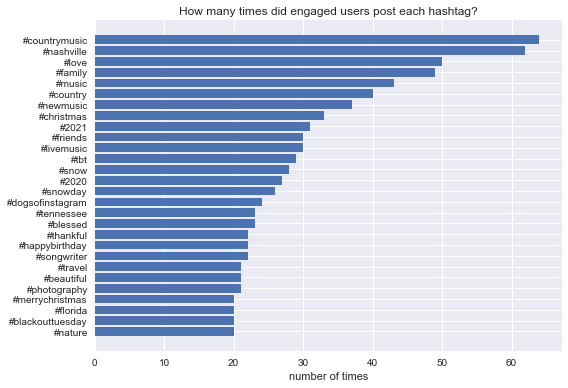

In [19]:
plt.style.use('seaborn')
used_tags = pd.read_csv('hyperengaged_users_used_tags.csv')
used_tags = used_tags[(used_tags['frequency'] >= 20)]
used_tags = used_tags.iloc[::-1]
plt.title('How many times did engaged users post each hashtag?')
plt.xlabel('number of times')
plt.barh(used_tags['hashtag'],used_tags['frequency'])
plt.tight_layout()
plt.savefig('plots/used_hashtags.png')

<h4><strong>Insights</strong></h4>
<p>The most frequently used hashtags revolve around Country music, Nashville, family, etc. This can be helpful to know what hashtags should be used in future posts from @loveandtheft.</p>

<h1>4. Where are users posting from?</h1>

In [23]:
post_frame = pd.read_csv('hyperengaged_users_posts.csv')
if path.exists('hyperengaged_users_post_loc.csv'):
    print('Reading loc_frame from files...')
    loc_frame = pd.read_csv('hyperengaged_users_post_loc.csv')
else:
    loc_frame = post_frame[post_frame['lat'].notnull()]
    loc_frame = loc_frame[loc_frame['lng'].notnull()]
    loc_frame = loc_frame.sort_values('City').reset_index()
    loc_frame = loc_frame.drop(columns='index')
    loc_frame.to_csv('hyperengaged_user_post_loc.csv',index=False)    
loc_list = loc_frame[['lat','lng']].values.tolist()
post_map = folium.Map(location=[36.16, -86.78], zoom_start=5)
folium.plugins.FastMarkerCluster(data=loc_list).add_to(post_map)
post_map

<h4>Insights</h4>
<ul>
<li>Love and Theft's engaged users are posting far more often from the Nashville area than anywhere else. They are a Nashville group, so this does make sense, but is perhaps suprising just how much it outweighs
    any other city. This means that the group could cater their content even more specifically to a Nashville audience. They do have fans represented across the country (Notably in Florida and Northern California), so it shouldn't
    be entirely Nashville exclusive, but there is room for deeper engagement with Music City.</li>

<h2>In Conclusion</h2>
<ul>
    <li>@loveandtheft has an extremely loyal following <i>in</i> Nashville.</li>
    <li>Engaged Users especially like mid-high quality content featuring the band specifically.</li>
    <li>Engaged Users are interested in country music, family, Tennessee, etc.</li>
</ul>

<p>I hope this data report can be of service, please do not hesitate to reach out if I can offer any clarity, or further analysis.</p>
<p>I am constantly trying to build on this program, so if there are any specific questions you have about an Instagram audience, I can't wait to hear your ideas!</p>
<h2>Ben Josie</h2>
<h3>(206) 817 9257</h3>
<h3>bjosie01@gmail.com</h3>
<h3>Shred On!</h3>